# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotions={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
url='https://github.com/emrekds/facial-expression-detection/blob/main/fer2013.csv?raw=true'
df=pd.read_csv('fer2013.csv')

## Explorotary Analysis

In [3]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [4]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
df['emotion'].value_counts(normalize=True)

3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64

In [233]:
import seaborn as sns
sns.set()

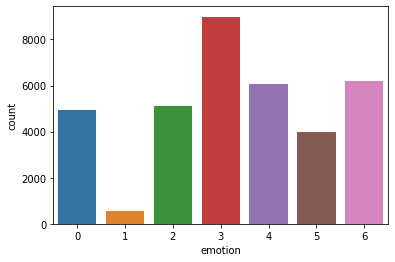

In [8]:
sns.countplot(df.emotion);

In [9]:
df['Usage'].value_counts(normalize=True)

Training       0.799983
PublicTest     0.100008
PrivateTest    0.100008
Name: Usage, dtype: float64

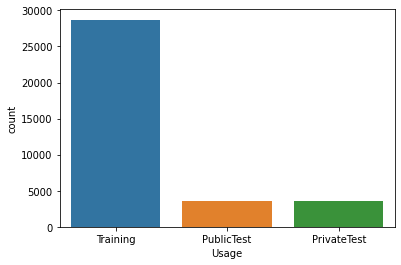

In [10]:
sns.countplot(df.Usage);

In [11]:
df.sample(5)

,emotion,pixels,Usage
906,3,115 109 106 118 100 80 84 77 84 82 83 87 90 87...,Training
12468,6,45 46 46 46 45 45 45 44 43 43 46 44 32 5 0 83 ...,Training
15281,2,255 152 59 49 42 40 43 45 80 154 192 203 203 2...,Training
27425,6,78 52 43 47 53 55 70 77 70 63 57 61 67 67 68 7...,Training
5569,4,69 36 43 82 112 112 159 205 199 205 207 214 21...,Training


In [12]:
len(df['pixels'][0].split())

2304

## Changing Pixels 

In [13]:
df['pixels']=df['pixels'].apply(lambda x:((np.reshape(x.split(),(48,48,1))).astype(np.float32))/255) 

In [14]:
df['pixels']

0        [[[0.27450982], [0.3137255], [0.32156864], [0....
1        [[[0.5921569], [0.5882353], [0.5764706], [0.60...
2        [[[0.90588236], [0.83137256], [0.6117647], [0....
3        [[[0.09411765], [0.1254902], [0.14117648], [0....
4        [[[0.015686275], [0.0], [0.0], [0.0], [0.0], [...
                               ...                        
35882    [[[0.19607843], [0.14117648], [0.06666667], [0...
35883    [[[0.69803923], [0.68235296], [0.6745098], [0....
35884    [[[0.06666667], [0.06666667], [0.0627451], [0....
35885    [[[0.11764706], [0.10980392], [0.10980392], [0...
35886    [[[0.07450981], [0.050980393], [0.05490196], [...
Name: pixels, Length: 35887, dtype: object

In [15]:
img1=df['pixels'][100]

In [16]:
img1.nbytes

9216

## Sample pictures

In [17]:
index=df.sample(10).index

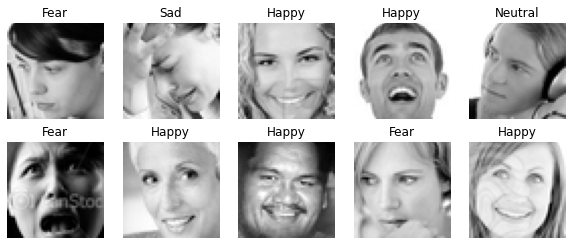

In [18]:
plt.figure(figsize=(10,4))
x,y=2,5
for i in range(10):
    plt.subplot(x,y,i+1)
    plt.imshow(df['pixels'][index[i]],cmap='gray')
    plt.title(emotions[df.iloc[index[i]]['emotion']])
    plt.axis('off')

# Preparing Data

In Kaggle competitions, only the training and test dataset is shared with the competitors.<br>
Competitor cannot see the private test set. And the performance of the model is measured by private test.

In [842]:
train=df[df['Usage']=='Training']
test=df[df['Usage']=='PublicTest']
p_test=df[df['Usage']=='PrivateTest']

In [843]:
from tensorflow.keras.utils import to_categorical

Changing shape of the X values from (28709,) to (28709,48,48) <br>
And then to (-1,48,48,1). Its necessary for tensorflow model. <br>
Also changing y values to categorical.


In [844]:
X_train=np.array([i.reshape(48,48) for i in (train['pixels'])]).reshape(-1,48,48,1)
X_test=np.array([i.reshape(48,48) for i in (test['pixels'])]).reshape(-1,48,48,1)
y_train=to_categorical(train['emotion'])
y_test=to_categorical(test['emotion'])

Final check on the values.

In [845]:
X_train.shape,X_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [846]:
y_train.shape,y_test.shape

((28709, 7), (3589, 7))

Everything is set for building model.

# Modelling

In [847]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

Model Build<br>
32conv + 32conv + 64conv with relu.<br>
64conv + 64conv + 128conv with relu<br>
256conv+flatten with relu<br>
fully connected 128 neurons + 256 neurons with swish<br>
Since strides of some convolutions is 2 and padding is valid i dont use any pooling. And i use batch normalization after every convolution.<br>
Final look of our model with shape (3,3,256)<br>
Optimizer : SGD

## Creating Sequential

In [1021]:
model=Sequential()

model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',input_shape=(48,48,1),activation='relu'))
model.add(BatchNormalization())


model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(2,strides=2))


model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(2,strides=2))

model.add(Dropout(.5))

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(2,strides=2))

model.add(Dropout(.25))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(.25))

model.add(Dense(256,activation='relu'))

model.add(Dropout(.25))

model.add(Dense(7,activation='softmax'))

In [1022]:
import tensorflow

In [1023]:
opt=tensorflow.keras.optimizers.SGD(learning_rate=0.025,nesterov=True)

In [1024]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='max',patience=10,verbose=1,restore_best_weights=True)

In [1025]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

Saving checkpoints of where model performing best.

In [1026]:
# checkpoint_filepath = 'saved_models/'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=False,
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

In [1027]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_183 (Conv2D)          (None, 48, 48, 128)       1280      
_________________________________________________________________
batch_normalization_182 (Bat (None, 48, 48, 128)       512       
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 48, 48, 128)       147584    
_________________________________________________________________
batch_normalization_183 (Bat (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 24, 24, 64)        73792     
_________________________________________________________________
batch_normalization_184 (Bat (None, 24, 24, 64)      

Since we use early stopping we can increase the number of epochs. So model won't be effected from overfitting.

## Fitting

In [855]:
model.fit(X_train,y_train,epochs=50,callbacks=[early_stop],validation_data=(X_test,y_test))

Epoch 1/50
898/898 [==============================] - 17s 17ms/step - loss: 1.7815 - accuracy: 0.2675 - val_loss: 1.5928 - val_accuracy: 0.3748
Epoch 2/50
898/898 [==============================] - 15s 17ms/step - loss: 1.5838 - accuracy: 0.3759 - val_loss: 1.4999 - val_accuracy: 0.4216
Epoch 3/50
898/898 [==============================] - 15s 16ms/step - loss: 1.4368 - accuracy: 0.4391 - val_loss: 1.4202 - val_accuracy: 0.4458
Epoch 4/50
898/898 [==============================] - 15s 16ms/step - loss: 1.3449 - accuracy: 0.4809 - val_loss: 1.3314 - val_accuracy: 0.4882
Epoch 5/50
898/898 [==============================] - 15s 17ms/step - loss: 1.2903 - accuracy: 0.5077 - val_loss: 1.3937 - val_accuracy: 0.4664
Epoch 6/50
898/898 [==============================] - 15s 17ms/step - loss: 1.2477 - accuracy: 0.5216 - val_loss: 1.1882 - val_accuracy: 0.5422
Epoch 7/50
898/898 [==============================] - 15s 17ms/step - loss: 1.2079 - accuracy: 0.5404 - val_loss: 1.2154 - val_accuracy:

Loading weights of best performing model from checkpoint.

In [856]:
# model.load_weights(checkpoint_filepath)

Saving model in h5 format. This way we can easily load and use model without fitting again.

In [857]:
model.save("saved_models/best_model.h5")

## Model Performance

In [858]:
result=pd.DataFrame(model.history.history)

Losses

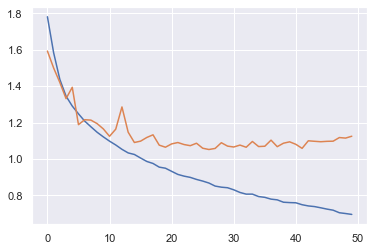

In [859]:
result.loss.plot()
result.val_loss.plot();

Accuracies

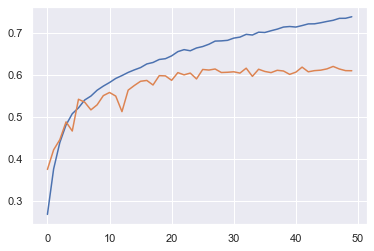

In [860]:
result.accuracy.plot()
result.val_accuracy.plot();

# Results

In [861]:
pred=np.argmax(model.predict(X_test),axis=1)

In [862]:
y_test=np.argmax(y_test,axis=1)

In [863]:
from sklearn.metrics import classification_report,confusion_matrix

In [864]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.59      0.54       467
           1       0.77      0.41      0.53        56
           2       0.44      0.36      0.39       496
           3       0.82      0.82      0.82       895
           4       0.49      0.50      0.50       653
           5       0.74      0.78      0.76       415
           6       0.55      0.54      0.54       607

    accuracy                           0.61      3589
   macro avg       0.61      0.57      0.58      3589
weighted avg       0.61      0.61      0.61      3589



In [865]:
print(confusion_matrix(y_test,pred))

[[277   1  49  20  62  17  41]
 [ 22  23   4   1   4   0   2]
 [ 65   3 177  22 120  52  57]
 [ 34   0  15 736  34  20  56]
 [ 81   2  80  45 326  13 106]
 [ 21   0  28  20  13 324   9]
 [ 61   1  49  54 105  10 327]]


## Private Test Results

In [866]:
private_x=(np.array([i.reshape(48,48) for i in (p_test['pixels'])])).reshape(-1,48,48,1)

In [867]:
private_y=p_test['emotion']

In [868]:
pred_p=np.argmax(model.predict(private_x),axis=1)

In [869]:
print(classification_report(private_y,pred_p))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       491
           1       0.71      0.49      0.58        55
           2       0.47      0.38      0.42       528
           3       0.84      0.86      0.85       879
           4       0.46      0.51      0.48       594
           5       0.77      0.75      0.76       416
           6       0.57      0.57      0.57       626

    accuracy                           0.62      3589
   macro avg       0.62      0.59      0.60      3589
weighted avg       0.62      0.62      0.62      3589



In [870]:
print(confusion_matrix(private_y,pred_p))

[[275   4  49  15  82  11  55]
 [ 15  27   5   1   6   0   1]
 [ 80   4 198  24 119  53  50]
 [ 24   0  18 754  28  19  36]
 [ 68   1  77  32 304   4 108]
 [  9   0  40  24   9 314  20]
 [ 60   2  36  49 114   7 358]]


## Mispredictions

In [871]:
df_result=pd.DataFrame()
df_result['predicted']=pred_p
df_result['expected']=list(private_y)

In [872]:
indexes=df_result[df_result['predicted']!=df_result['expected']].sample(15).index

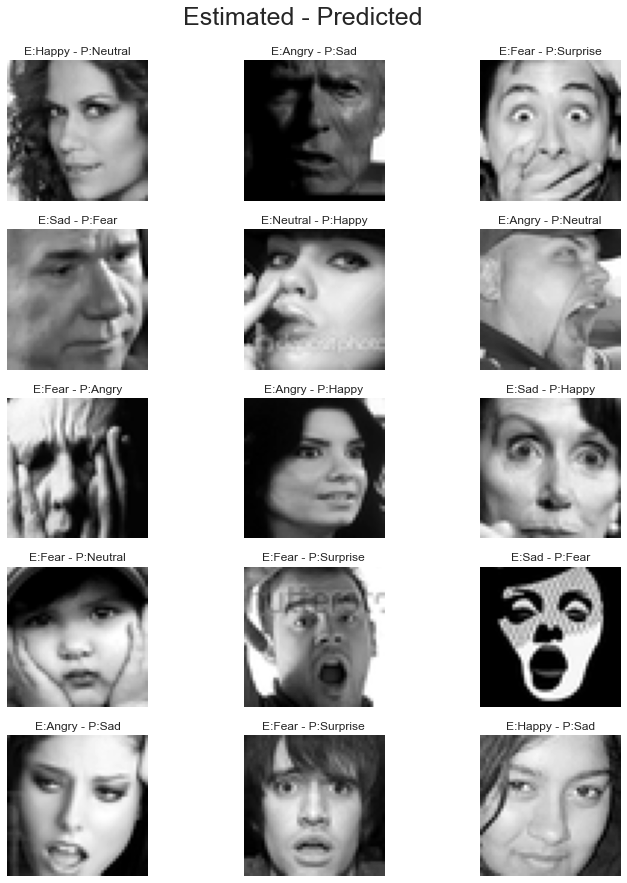

In [873]:
plt.figure(figsize=(12,15))
x,y=5,3
for i in range(15):
    plt.subplot(x,y,i+1)
    plt.imshow(p_test['pixels'].iloc[indexes[i]],cmap='gray')
    plt.title('E:'+emotions[p_test['emotion'].iloc[indexes[i]]]+ ' - ' +'P:'+ emotions[df_result['predicted'].iloc[indexes[i]]])
    plt.axis('off')
plt.suptitle('Estimated - Predicted',y=.93,fontsize=25);

In [874]:
df_ptest=df[df['Usage']=='PrivateTest']

In [875]:
model=tensorflow.keras.models.load_model('saved_models/best_model.h5')

In [876]:
samples=df_ptest.sample(5)

In [877]:
ind=np.random.randint(5)

In [878]:
preds=model.predict(samples['pixels'].iloc[ind].reshape(-1,48,48,1))
emotions[samples['emotion'].iloc[ind]]

'Angry'

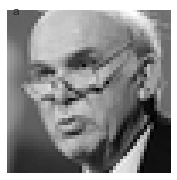

In [879]:
plt.figure(figsize=(3,3))
plt.imshow(samples['pixels'].iloc[ind],cmap='gray')
plt.axis('off')
plt.text(1,1,'a');

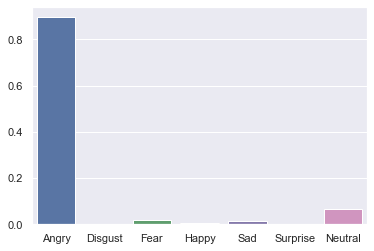

In [880]:
sns.barplot(y=preds.reshape(7),x=list(emotions.values()));

In [881]:
dict(zip(preds.reshape(7),list(emotions.values())))

{0.89598984: 'Angry',
 0.00114684: 'Disgust',
 0.016579377: 'Fear',
 0.0066781766: 'Happy',
 0.013259669: 'Sad',
 0.0017260603: 'Surprise',
 0.064620085: 'Neutral'}

In [882]:
from tensorflow.keras.preprocessing.image import load_img

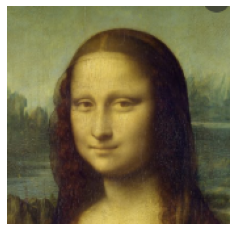

In [1001]:
img1=load_img('images/face2.png')
img=load_img('images/face2.png',grayscale=True,target_size=(48,48))
plt.imshow(img1)
plt.axis('off');

In [1002]:
from tensorflow.keras.preprocessing.image import img_to_array

In [1003]:
img=img_to_array(img)/255

In [1004]:
img=np.expand_dims(img,axis=0)

In [1005]:
model.predict(img)

array([[1.8020520e-02, 1.1938076e-04, 2.3116469e-01, 8.2970582e-02,
        1.9952156e-01, 4.9743811e-03, 4.6322888e-01]], dtype=float32)

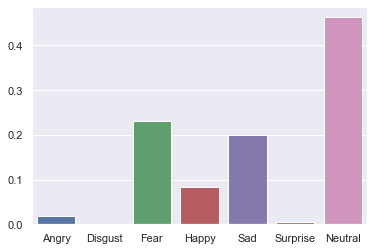

In [1006]:
sns.barplot(y=model.predict((np.array(img)).reshape(-1,48,48,1)).reshape(7),x=list(emotions.values()));

In [933]:
import cv2
import PIL,urllib

In [1018]:
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvYGoZYPPvDdVNNj4DS732yyXGf_PMz9iRX4pbM3MMsE1FUrr9HEUu5HLnkOEiQPbbPkg&usqp=CAU'

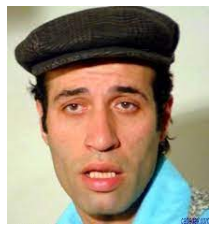

In [1019]:
img=np.array(PIL.Image.open(urllib.request.urlopen(url)))
plt.imshow(img)
plt.axis('off')
img=cv2.cvtColor(img,cv2.COLOR_RGBA2GRAY)
img=cv2.resize(img,(48,48))
img=img/255

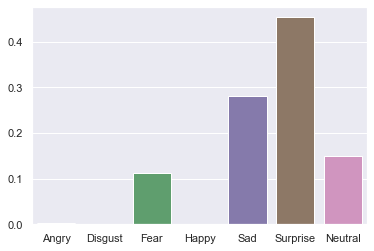

In [1020]:
sns.barplot(y=model.predict((np.array(img)).reshape(-1,48,48,1)).reshape(7),x=list(emotions.values()));